In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(128, activation='relu')(input_img)  # Increased size of hidden layer
#ADDITIONAL HIDDDEN LAYER
hidden_layer = Dense(64, activation='relu')(encoded)  # Adding a hidden layer with 64 neurons
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden_layer) #hidden layer
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
new_var = autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# by effectively adjusting learning rates, Adam helps the autoencoder model find a set of weights that minimize the validation loss

from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 4s 12ms/step - loss: 0.3781 - val_loss: 0.3177
Epoch 2/5
235/235 [==============================] - 4s 15ms/step - loss: 0.3051 - val_loss: 0.2998
Epoch 3/5
235/235 [==============================] - 3s 15ms/step - loss: 0.2941 - val_loss: 0.2931
Epoch 4/5
235/235 [==============================] - 3s 12ms/step - loss: 0.2888 - val_loss: 0.2890
Epoch 5/5
235/235 [==============================] - 3s 12ms/step - loss: 0.2853 - val_loss: 0.2859


313/313 [==============================] - 2s 4ms/step


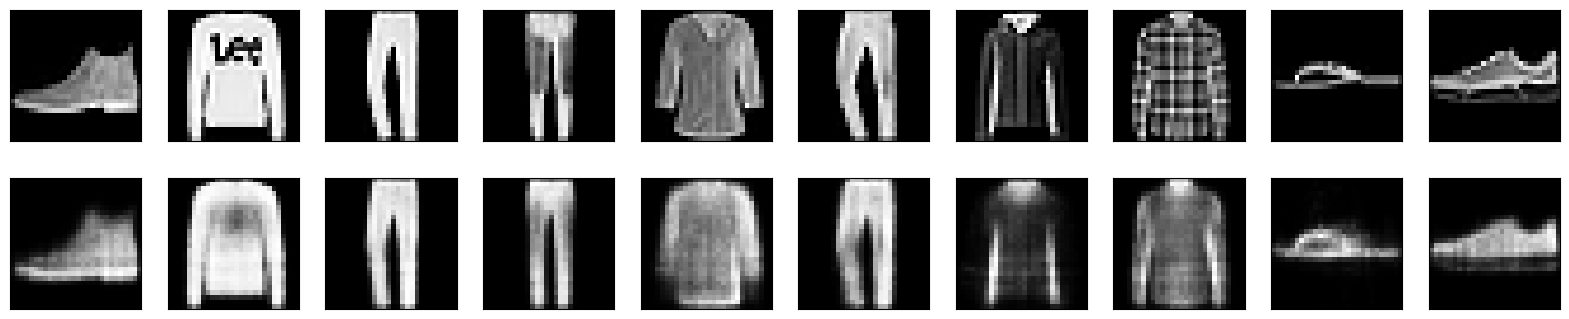

In [ ]:
import matplotlib.pyplot as plt

# Predict on test data
decoded_imgs = autoencoder.predict(x_test)

# Function to plot images
def plot_images(original_images, decoded_images, num_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        # Original images
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(original_images[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Reconstructed images
        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(decoded_images[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Visualize original and reconstructed images
plot_images(x_test, decoded_imgs)

Epoch 1/25
600/600 [==============================] - 7s 10ms/step - loss: 0.3697 - val_loss: 0.3481
Epoch 2/25
600/600 [==============================] - 5s 8ms/step - loss: 0.3294 - val_loss: 0.3446
Epoch 3/25
600/600 [==============================] - 6s 10ms/step - loss: 0.3233 - val_loss: 0.3293
Epoch 4/25
600/600 [==============================] - 5s 8ms/step - loss: 0.3200 - val_loss: 0.3220
Epoch 5/25
600/600 [==============================] - 5s 8ms/step - loss: 0.3176 - val_loss: 0.3143
Epoch 6/25
600/600 [==============================] - 6s 10ms/step - loss: 0.3159 - val_loss: 0.3088
Epoch 7/25
600/600 [==============================] - 5s 8ms/step - loss: 0.3145 - val_loss: 0.3067
Epoch 8/25
600/600 [==============================] - 6s 10ms/step - loss: 0.3136 - val_loss: 0.3063
Epoch 9/25
600/600 [==============================] - 5s 8ms/step - loss: 0.3127 - val_loss: 0.3055
Epoch 10/25
600/600 [==============================] - 5s 8ms/step - loss: 0.3123 - val_loss: 0.

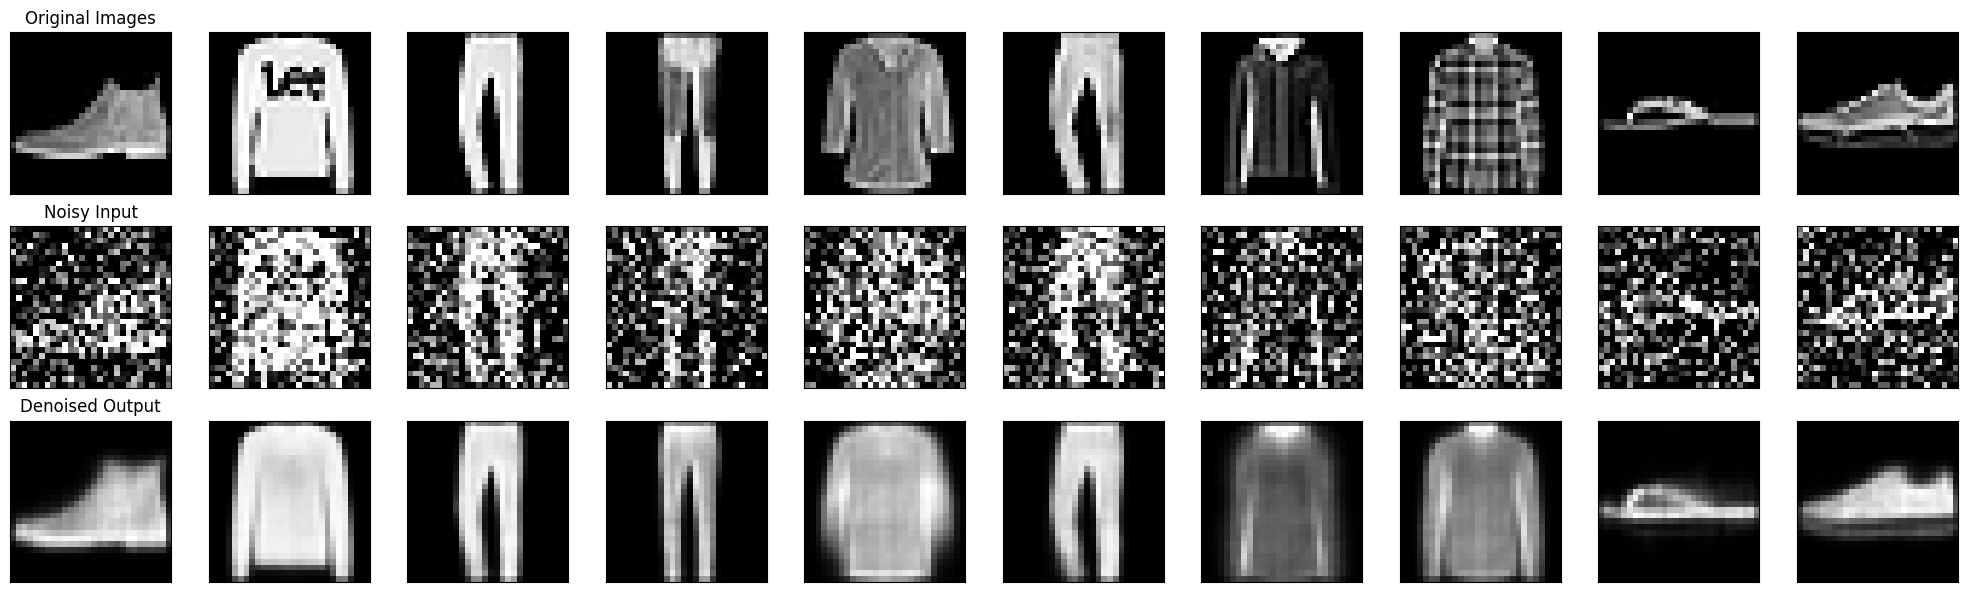

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, GaussianNoise
from keras.models import Model

# Define the size of our encoded representation
encoding_dim = 32  # 32 floats -> compression factor of 24.5 assuming the input is 784 floats

# Input placeholder with added noise
input_img = Input(shape=(784,))
noisy_img = GaussianNoise(0.5)(input_img)  # Adding Gaussian noise with stddev=0.5
# Encoded representation
encoded = Dense(128, activation='relu')(noisy_img)  # Increased size of hidden layer
# Additional hidden layer
hidden_layer = Dense(64, activation='relu')(encoded)  # Adding a hidden layer with 64 neurons
# Decoded representation
decoded = Dense(784, activation='sigmoid')(hidden_layer)
# Denoising Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder (defaults to adam optimizer with default learning rate)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Loading and preprocessing the Fashion MNIST data
from keras.datasets import fashion_mnist

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Add Gaussian noise to the training and test data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Training the denoising autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=25,  # Increased epochs for better training
                batch_size=100,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Predict on test data
decoded_imgs = autoencoder.predict(x_test_noisy)

# Function to plot images
def plot_images(original_images, noisy_images, decoded_images, num_images=10):
    plt.figure(figsize=(20, 6))
    for i in range(num_images):
        # Original images
        ax = plt.subplot(3, num_images, i + 1)
        plt.imshow(original_images[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title('Original Images')

        # Noisy images
        ax = plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(noisy_images[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title('Noisy Input')

        # Reconstructed images
        ax = plt.subplot(3, num_images, i + 1 + 2 * num_images)
        plt.imshow(decoded_images[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title('Denoised Output')
    plt.tight_layout()
    plt.show()

# Visualize original, noisy, and denoised images
plot_images(x_test, x_test_noisy, decoded_imgs)

Epoch 1/20
469/469 [==============================] - 11s 22ms/step - loss: 0.3780 - val_loss: 0.3548
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.3313 - val_loss: 0.3404
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3248 - val_loss: 0.3328
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3212 - val_loss: 0.3283
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3190 - val_loss: 0.3202
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3172 - val_loss: 0.3189
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3158 - val_loss: 0.3172
Epoch 8/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3148 - val_loss: 0.3073
Epoch 9/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3140 - val_loss: 0.3067
Epoch 10/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3132 - val_l

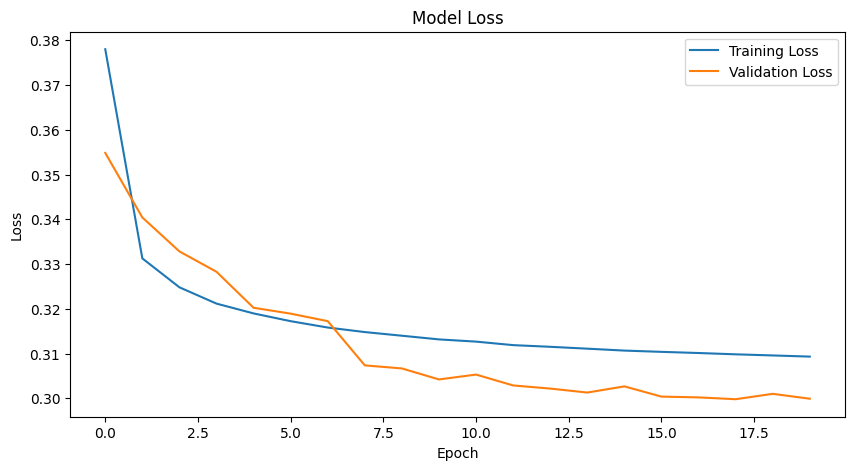

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, GaussianNoise
from keras.models import Model
from keras.datasets import fashion_mnist

# Load and preprocess Fashion MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Add Gaussian noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the denoising autoencoder model
input_img = Input(shape=(784,))
noisy_img = GaussianNoise(0.5)(input_img)
encoded = Dense(128, activation='relu')(noisy_img)
hidden_layer = Dense(64, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(hidden_layer)
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the denoising autoencoder
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=20,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

# Plot training history (loss)
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()